## Pandas Tips

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.series import Series
from pandas.io.formats.style import Styler
import seaborn as sns

## use display for html output
from IPython.display import display, HTML

# auto-reload modules
%load_ext autoreload
%autoreload 2

# set pandas display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 1000)

# set dark theme
plt.style.use('dark_background')

## Using query to filter data

Usage:
- `df.query('col1 > 0')`
- `df.query('col1 > @var_name')`

In [2]:
from sklearn.datasets import load_wine

raw_data = load_wine()
# dir(raw_data)
x = pd.DataFrame(raw_data['data'], columns=raw_data['feature_names'])
y = pd.DataFrame(raw_data['target'], columns=['target'])

df = pd.concat([x, y], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# using the loc method 
query_data_1 = df.loc[ (df['malic_acid'] > 4 ) & (df['target'] == 0)]

# using the query method
query_data_2 = df.query('malic_acid > 4 and target == 0')

display(query_data_1)
display(query_data_2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.3,1.25,5.24,0.87,3.33,1080.0,0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.3,1.25,5.24,0.87,3.33,1080.0,0


In [4]:
max_malic_acid = 4
query_data_3 = df.query('malic_acid > @max_malic_acid and target == 0')
display(query_data_3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.3,1.25,5.24,0.87,3.33,1080.0,0


## Pandas plotting methods

<AxesSubplot:xlabel='malic_acid', ylabel='ash'>

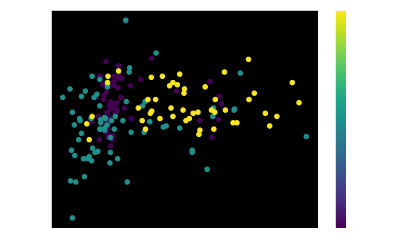

In [5]:
# use the pandas plot method
df.plot(kind='scatter', x='malic_acid', y='ash', c='target', colormap='viridis')

## Rename columns using the dict syntax

Usage:
- `df.rename(columns={'old_name': 'new_name'})`

## Aggregating data using groupby

In [6]:
df.groupby("target").alcohol.min()

target
0    12.85
1    11.03
2    12.20
Name: alcohol, dtype: float64

In [7]:
df.groupby("target").alcohol.agg(['min', 'max', 'mean', 'median', 'std', 'count', 'sum'])

,min,max,mean,median,std,count,sum
target,,,,,,,
0,12.85,14.83,13.744746,13.750,0.462125,59,810.94
1,11.03,13.86,12.278732,12.290,0.537964,71,871.79
2,12.20,14.34,13.153750,13.165,0.530241,48,631.38


## Conditional Formatting in Pandas

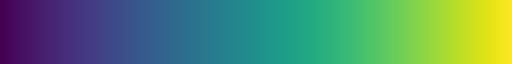

In [82]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap
lin_space = np.linspace(0, 1, 1000)
cmap: ListedColormap = mpl.colormaps['viridis']
ListedColormap(cmap(lin_space))

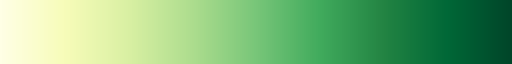

In [83]:
mpl.colormaps['YlGn']

In [90]:
data =  pd.DataFrame(np.random.randn(5, 3), columns=list('ABC'))
data["temperature_degrees"] = [-20, 30, 40, 50, 60]
data["pressure_psi"] = [100.0, 101.7, 200.0, 200.10, 500]

# dictionary of column colors

#            |---- header ----- | --- color --- |
color_dict = {'B':'grey', 'C':'rgb(255, 0, 0)'}
#                |---- header ----- | --- grad --- |
gradient_dict = {'temperature_degrees': 'viridis', 'A': 'YlGn'}


def apply_gradient(s : Series, max_ele: float, min_ele: float, cmap='viridis'):
    percent_color = (s - min_ele) / (max_ele - min_ele)
    return f'background-color: {percent_color}'

def get_color_string(color: tuple) -> str:
    """ convert a color tuple(0 to 1) to a string rgb(0-255) """
    r = int(color[0] * 255)
    g = int(color[1] * 255)
    b = int(color[2] * 255)
    return f'rgb({r}, {g}, {b})'

def get_gradient_list(s: Series, cmap: str):
    listed_cmap: ListedColormap = mpl.colormaps[cmap] # getting a cmap i.e the gradient data
    return listed_cmap(s) # getting the gradient data based on number of values in the series

def highlight_cols(s : Series, color_dict: dict = {}, gradient_dict: dict = {}):
    if s.name in color_dict.keys():
        return [f'background-color: {color_dict[s.name]}'] * len(s)
    elif s.name in gradient_dict.keys():
        return [f'background-color: {get_color_string(color)}' 
            for color in get_gradient_list(s, gradient_dict[s.name])]
    return [''] * len(s)

def pressure_format_func(x: float) -> str:
    # show red if high
    if x > 200:
        return "high"
    elif x < 150:
        return "low"
    else:
        return "medium"

(data
    .style
    .apply(highlight_cols, color_dict=color_dict, gradient_dict=gradient_dict)
    .format(
        {   'temperature_degrees': '{:.0f}°C',
            ('A', 'B', 'C'): '{:.2f}',
            'pressure_psi': pressure_format_func
        })
     )

,A,B,C,temperature_degrees,pressure_psi
0,-0.357886,0.314223,-0.302722,-20°C,low
1,0.721680,0.076037,-0.014621,30°C,low
2,0.819385,1.307506,1.160242,40°C,medium
3,1.023440,-0.053385,0.179076,50°C,high
4,1.612700,-2.160506,-0.207260,60°C,high
